# YOLO v10

Here to show how we can use yolov10 to do same basic tasks.

Environment:
- Gentoo Linux 2.4
- AMD EPYC 7532 32-Core

source code:
 - https://github.com/THU-MIG/yolov10

    - the core program is in ultralytics

 - models: https://github.com/jameslahm/yolov10/releases

infos
 - comparison of yolov5, yolov8 and yolov10: https://arxiv.org/pdf/2407.02988
 - details about yolov10: https://docs.ultralytics.com/fr/models/yolov10/#comparisons
 

## I. Quick Test

The inference can be done using cpu.

#### 1. create environment
 
 This is recommanded for not mess up with system python environment (version conflicts). In the working directory (of choice), create a python environment. 
   
  ```bash
    $ python -m venv yolov10-env 
  ```
  Then activate it:
  ```bash
    $ source /yolov10-env/bin/activate
  ```
  If using conda, use conda commands.

#### 2. clone from the repo
 In the same directory, clone the github repo:
  ```bash
    $ git clone https://github.com/THU-MIG/yolov10.git
  ```

#### 3. Install packages
 For this test, I used the version cd2f79c70299c9041fb6d19617ef1296f47575b1. When I run:
  ```bash
    $ python -m pip install -r requirements.txt
  ```
 I got error 'ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0)...'. So in the requirements.txt file, instead of "==" for package versions, I change them to ">=" before rerun the pip install.
 Or you can change the versions corresponding to your python version.

#### 4. run app
Change to the folder 'yolov10' and run:
  ```bash
    $ cd yolov10, python app.py
  ```
The output is:
```bash
 Running on local URL:  http://127.0.0.1:7860
```
Open the url in a browser and you can test the provided image or your own images through the UI.

## II. Python

The doc to do inferences: https://docs.ultralytics.com/modes/predict/#inference-arguments

### 1. download from Hugging Face

If use pipy's ultralytics, use 'from ultralytics import YOLO' instead of 'from ultralytics import YOLOv10'.

In [2]:
# if not in the yolov10 project folder, should set the python path
import sys
sys.path.append("./yolov10/yolov10")

(774, 435)


[W903 17:21:38.905937583 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.



0: 480x800 6 persons, 3 handbags, 653.0ms
Speed: 5.7ms preprocess, 653.0ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)


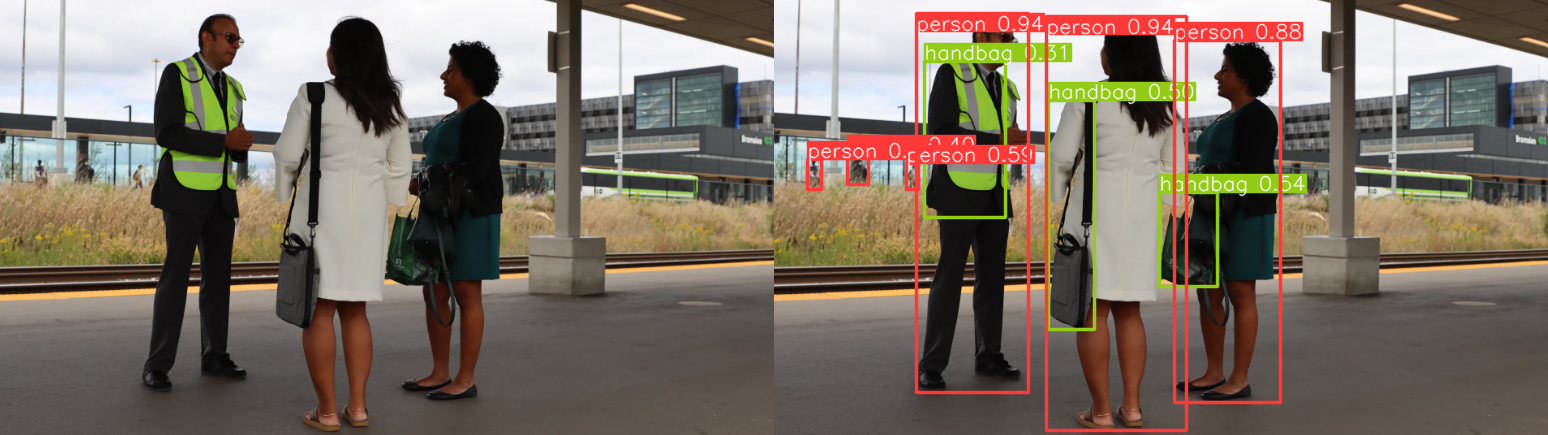

In [1]:
# load image
from diffusers.utils import load_image, make_image_grid
image = load_image("https://img.masstransitmag.com/files/base/cygnus/mass/image/2023/09/16x9/Screenshot_2023_07_11_134850.65118938ce022.png")
print(image.size)

# load yolo model
from ultralytics import YOLOv10  # if use pipy, use from ultralytics import YOLO
ckp = "jameslahm/yolov10s"
model = YOLOv10.from_pretrained(ckp)

# inference
results = model.predict(source=image, imgsz=800, conf=0.25)
output = results[0].plot()[:, :, ::-1] ## to RGB PIL image

# plot
import PIL.Image as Image
make_image_grid([image, Image.fromarray(output)], cols=2, rows=1)

### 2. download from github

In this case, we should download the model locally first manually:

```bash
!wget -P path_to_store_the_model -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
```

Choose the "path_to_store_the_model" to store the model, and load it using (if not current dir, you should specify the path as well):

```python
model_local = YOLOv10("yolov10s.pt")
```

We can find all available models here: https://github.com/THU-MIG/yolov10/releases/.

In [42]:
model_local = YOLOv10("yolov10s.pt")

/home/niuniu/Documents/DL_pytorch/yolov10/yolov10/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



0: 480x800 6 persons, 612.6ms
Speed: 5.7ms preprocess, 612.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 800)


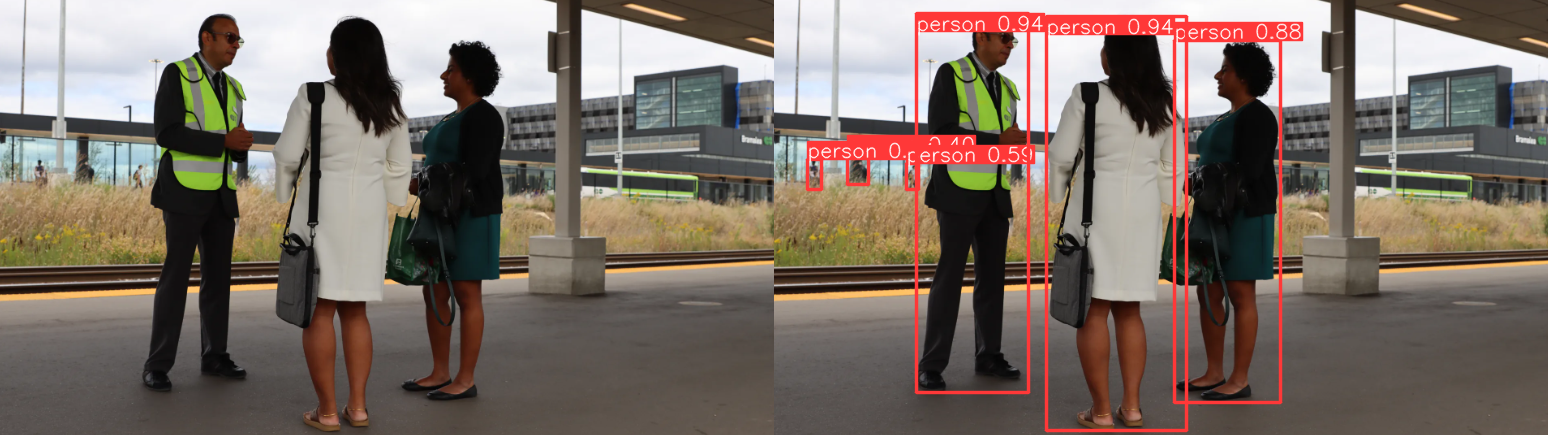

In [45]:
# inference
results = model_local(source=image, classes=[0]) # choose only one class to detect
output = results[0].plot()[:, :, ::-1] # to RGB PIL image

# plot
import PIL.Image as Image
make_image_grid([image, Image.fromarray(output)], cols=2, rows=1)

### 3. Video

In [3]:
# save by default to 'runs/detect/predict'

results = model(source="./video_street.mp4", save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/286) /home/niuniu/Documents/DL_pytorch/yolov10/video_street.mp4: 480x800 (no detections), 713.6ms
video 1/1 (frame 2/286) /home/niuniu/Documents/DL_pytorch/yolov10/video_street.mp4: 480x800 (no detections), 646.9ms
video 1/1 (frame 3/286) /home/niuniu/Documents/DL_pytorch/yolov10/video_street.mp4: 480x800 (no detections), 649.0ms
video 1/1 (frame 4/286) /home/niuniu/Documents/DL_pytorch/yolov10/video_street.mp4: 480x800 9 persons, 62

In [9]:
from IPython.display import Video

Video("./yolov10/runs/detect/predict/video_street.avi", embed=True, width=480, height=256)

Potentials problems:

 - error: OpenCV(4.10.0) 
    - msg: error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1284: error: (-2:Unspecified error) The function is not implemented.
    - solution: https://stackoverflow.com/questions/67120450/error-2unspecified-error-the-function-is-not-implemented-rebuild-the-libra